<a href="https://colab.research.google.com/github/Charanpoojary/Global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium as mp # to extract map


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Datasets/Global Terrorism Data.csv',encoding = 'latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df # dataset

## **BASIC OPERATIONS**

In [ ]:
df.shape # to find shape of the dataset

In [ ]:
df.head() # returns first 5 rows of the dataset

In [ ]:
df.tail() # returns last 5 rows of the dataset

In [ ]:
df.describe() # returns the numerical columns and its operations

In [ ]:
df.info() # returns the information of the dataset

In [ ]:
df.columns # returns the columns in a dataset

In [ ]:
print(list(df.index)) # returns the index of the dataset

In [ ]:
df.isnull().sum() # returns the count of null values in each column

In [ ]:
df.shape[0] # returns the count of rows

In [ ]:
df.shape[1] #returns the count of column

## **NULL VALUE OPERATIONS**

In [ ]:
null_percentage=((df.isnull().sum())*100/df.shape[0]) # percentage of null values in each column
null_percentage


In [ ]:
max_null=dict(null_percentage[null_percentage >10]) # columns having more than 10% null values and its percentage
max_null_column=(null_percentage[null_percentage >10]).keys() # extracting keys from dictionary i,e columns
max_null_column


In [ ]:
easy_data=df.drop(columns=max_null_column) # deleting the columns which has more than 10% null values


In [ ]:
easy_data.shape[1] #remaining columns after deleting max_null_column(i,e we have deleted 90 columns from our original data set)

In [ ]:
sns.heatmap(easy_data.isnull()) # in this heatmap we can observe the remaining null values

In [ ]:
easy_data=easy_data.dropna() # dropna() is going to delete rows with null values

In [ ]:
easy_data.shape[0] # returns the count remaining rows of a dataset

In [ ]:
sns.heatmap(easy_data.isnull()) # there is no null vales in the plot

In [ ]:
easy_data.isnull().sum() # we can clearly see that there is no null values present in our dataset

In [ ]:
# we have deleted null value column/rows,now lets delete some unwanted columns

# **DELETE UNWANTED COLUMNS**

In [ ]:
ready_data=easy_data.drop(columns=['extended', 'country','region','specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple','weaptype1','attacktype1','targtype1','targsubtype1','natlty1', 'natlty1_txt',
       'guncertain1', 'individual', 
        'weaptype1','property', 'ishostkid', 'dbsource','INT_LOG', 
        'INT_IDEO', 'INT_MISC', 'INT_ANY'])# deleting unwanted columns

In [ ]:
ready_data.shape[1] # returns the count remaining column of a dataset

In [ ]:
# renaming the remaining columns
my_data=ready_data.rename(columns={
    'eventid':'event_id',
    'iyear':'year',
    'imonth':'month',
    'iday':'day',
    'country_txt':'country',
    'region_txt':'region',
       'provstate':'state',
       'attacktype1_txt':'attack_type',
    'targtype1_txt':'targ_type',
    'targsubtype1_txt':'targsub_type',
    'target1':'main_target',
       'gname':'gang_name',
    'weaptype1_txt':'weapon_type',
    'nkill':'number_of_kill',
    'nwound':'number_of_wound'
    
})

In [ ]:
my_data.shape # this is the count of rows and columns of a cleaned dataset

In [ ]:
list(my_data.columns)# remaining columns

**COUNTRY WITH MOST ATTACKS**

In [ ]:
all_country_with_attack=my_data['country'].value_counts() # returns the attack data for all the country
most_attacked_country=my_data['country'].value_counts().idxmax() # here idxmax() returns the index of maximum value
most_attacked_country

'Iraq'

In [ ]:
# plotting the location for most attacked country
most_attacked_country_latitude=my_data[my_data['country']==most_attacked_country].iloc[0:9] 
ma=mp.Map(location=[36.354145,43.143570])
for i in most_attacked_country_latitude.itertuples():
    mp.Marker(location=[i.latitude,i.longitude],popup=i.city
).add_to(ma)
ma

**CITY WITH MOST ATTACKS**

In [ ]:
all_city_with_attacks=my_data['city'].value_counts() # returns the attack data for all the city
most_attacked_city=my_data['city'].value_counts().idxmax() #  here idxmax() returns the index of maximum value
most_attacked_city

**REGION WITH MOST ATTACKS**

In [ ]:
all_region_with_attacks=my_data['region'].value_counts() #  returns the attack data for all the region
most_attacked_region=my_data['region'].value_counts().idxmax()# here idxmax() returns the index of maximum value
most_attacked_region

**YEAR WITH MOST ATTACKS**

In [ ]:
year_with_attacks=my_data['year'].value_counts()#  returns the attack data for all the year
most_attacked_year=my_data['year'].value_counts().idxmax()# here idxmax() returns the index of maximum value
most_attacked_year

**MONTHS WITH MOST ATTACKS**

In [ ]:
months_with_attacks=my_data['month'].value_counts() #  returns the attack data for all the month
most_attacked_month=my_data['month'].value_counts().idxmax() # here idxmax() returns the index of maximum value
most_attacked_month

**GANGNAME WITH MOST ATTACKS**

In [ ]:
gangname_with_attacks=my_data['gang_name'].value_counts() #  returns the attack data for all the gangname
most_attacked_gangname=my_data['gang_name'].value_counts().index[1] # here idxmax() returns the index of maximum value
most_attacked_gangname

**MOST ATTACK TYPE**

In [ ]:
type_with_attacks=my_data['attack_type'].value_counts() #  returns the attack data for all the type
most_attacked_type=my_data['attack_type'].value_counts().idxmax() # here idxmax() returns the index of maximum value
most_attacked_type

**ATTACKS IN EVERY YEAR ON SOME MOST ATTACKED REGIONS**

In [ ]:
my_data['year'].value_counts().sort_index()

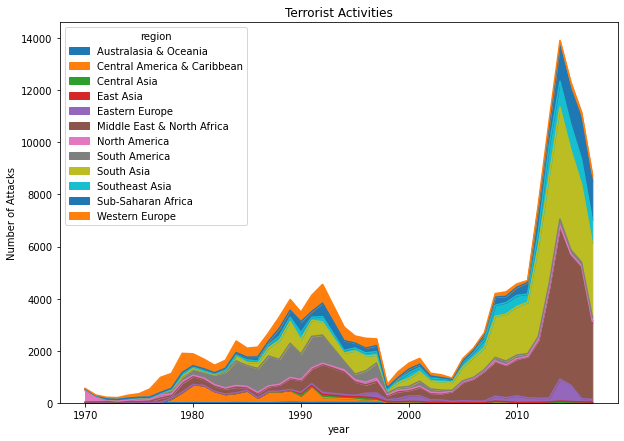

In [ ]:
pd.crosstab(my_data.year,my_data.region).plot(kind='area',figsize=(10,7))# plotting the area graph for different countries
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.show()

**ATTACKS IN EVERY YEAR**

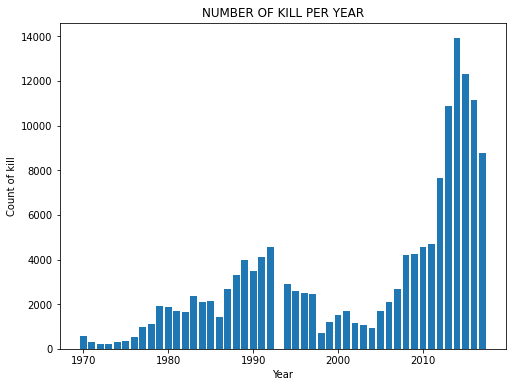

In [ ]:
x_year = my_data['year'].unique()
y_year = my_data['year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(x_year, y_year)
plt.title('NUMBER OF KILL PER YEAR')
plt.xlabel('Year')
plt.ylabel('Count of kill')
plt.show()


**NO OF KILLS BY DIFFERENT GROUPS**

In [ ]:
group_kills=my_data.groupby(['gang_name'])['number_of_kill'].sum().sort_values(ascending=False) # performing groupby operation,it groups the gang and sums the kills in perticular gang
group_kills               # total no of kills by each different groups

In [ ]:
group_kills.head(5) # top 5 gang including unknown

In [ ]:
group_kills.head(5).plot(kind='bar') # plots for top 5 gangs including unknown
plt.title('Number of People Killed by each terroris group')  # giving the title for the graph
plt.xlabel('GANG NAME') # labeling for x axis
plt.ylabel('PEOPLE DIED') # labeling for y axis

**NUMBER OF KILLS AND NUMBER OF WOUND COMPARISON EVERY YEAR**

In [ ]:
kills_and_wounds=my_data.groupby(['year']).agg({'number_of_kill' : np.sum,'number_of_wound' : np.sum}) # sum of kills and wounds every year using aggregating function
kills_and_wounds

In [ ]:

plt.plot(kills_and_wounds.number_of_kill,label="number_of_kills") # plotting line chart for number of kills every year
plt.plot(kills_and_wounds.number_of_wound,label="number_of_wound")# plotting line chart for number of wounds every year
plt.title('NUMBER OF KILLS AND NUMBER OF WOUND COMPARISON EVERY YEAR')  # giving the title for the graph
plt.xlabel('year') # labeling for x axis
plt.ylabel('kills and wounds') # labeling for y axis
plt.legend() # it notifies the meaning od each line in the graph

 **PERCENTAGE OF ATTACKS BY BY EACH GANG**

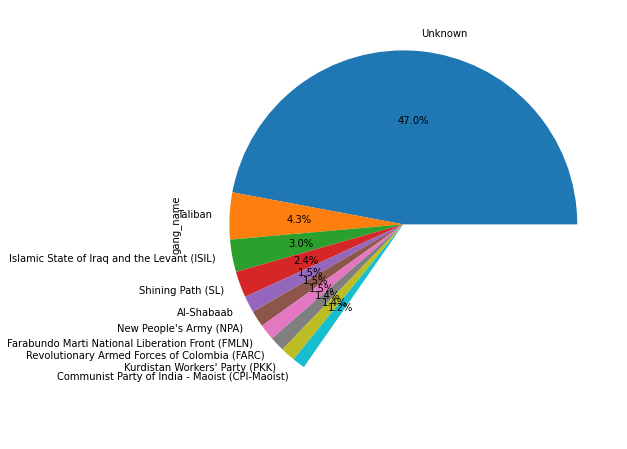

In [ ]:
gangs_attacks_in_percentage=my_data.gang_name.value_counts(normalize=True,ascending=False) # total no of attacks by each gang in percentage
gangs_attacks_in_percentage.head(10).plot.pie(autopct="%.1f%%",figsize=(10,8))
plt.show()

**MAX HUMANITY LOSS**

In [ ]:
max_death=my_data['number_of_kill'].max() # max no of death in a single attack
my_data[my_data['number_of_kill']== max_death] # complete information for max humanity loss

**KILLS IN EVERY COUNTRY WHICH IS GREATER THAN 10000**

In [ ]:
country_kills=my_data.groupby(['country'])['number_of_kill'].sum() # all countries with total no of kills
country_kills=country_kills.reset_index()
kills_more_than_10000=country_kills[country_kills['number_of_kill']>10000] # country kills which are greater than 10000
kills_more_than_10000=kills_more_than_10000.sort_values('number_of_kill',ascending=False) #sorting number of kill columns in descending order
kills_more_than_10000=kills_more_than_10000.reset_index(drop=True)
kills_more_than_10000

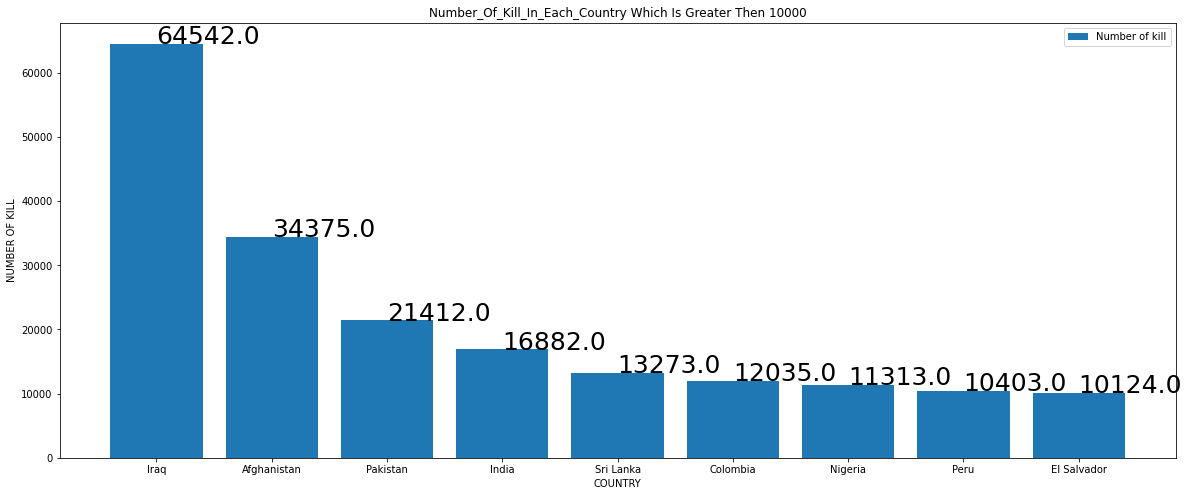

In [ ]:
plt.figure(figsize=(20,8)) # giving the size to the chart
plt.xlabel('COUNTRY') # labeling x axis
plt.ylabel('NUMBER OF KILL') # labeling y axis
plt.title('Number_Of_Kill_In_Each_Country Which Is Greater Then 10000') # giving the title to the chart
plt.bar(kills_more_than_10000.country,kills_more_than_10000.number_of_kill,label='Number of kill') # plotting bar charts
plt.legend()
for i in range(len(kills_more_than_10000['country'])):
        plt.text(kills_more_than_10000['country'][i],kills_more_than_10000['number_of_kill'][i],kills_more_than_10000['number_of_kill'][i],fontsize=25)

In [ ]:
# get the information for only 'Al-Qaida' group
ALQUIDA=my_data[my_data['gang_name']=='Al-Qaida']
ALQUIDA.head(10)

In [ ]:
ALQUIDA.shape # returns the rows and column of the dataset ALQUIDA

## Al_Qaida Mostly used bombing/explosion for attacking
## so if we control on the illegal tranportation of weapons then we can reduse the attacks 
## we can see that in only one year (2001) there were 2 attacks on the same day on a same place
## so we can say that there might be  some disput between USA and Al_Qaida

**TARGET TYPES**

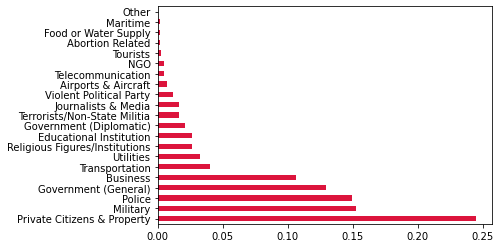

In [ ]:
my_data.targ_type.value_counts(normalize=True).plot(kind='barh',color='crimson') # target types and it has been normalised to same scale
plt.show()

**10  COUTRIES WHICH ARE DANGEROUS TO LIVE**

In [ ]:
most_number_of_attack=pd.DataFrame(my_data['country'].value_counts()) # all countries with its attacks
most_number_of_attack=most_number_of_attack.reset_index() 
most_number_of_attack=most_number_of_attack.rename(columns={'index':'country','country':'number_of_attacks'}) # renaming the column names

In [ ]:
TOP_10_MOST_ATTCKED_COUNTRY=most_number_of_attack[most_number_of_attack['number_of_attacks']>3000] # countries in which the attacks are more than 3000
TOP_10_MOST_ATTCKED_COUNTRY

Text(0, 0.5, 'country')

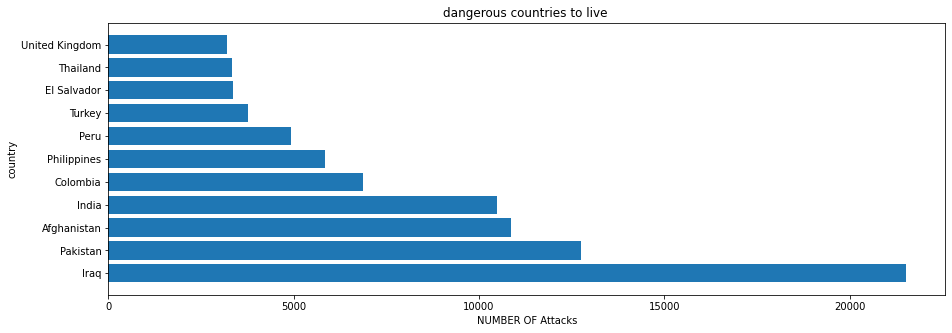

In [ ]:
plt.figure(figsize=(15,5)) # size to the plots
plt.barh(TOP_10_MOST_ATTCKED_COUNTRY.country,TOP_10_MOST_ATTCKED_COUNTRY.number_of_attacks) # plotting the horizontal bar chart
plt.title('dangerous countries to live ') # giving title to the graph
plt.xlabel('NUMBER OF Attacks') # labeling x axis
plt.ylabel('country') # labeling y axis

**Operations on worlds top gangs**

In [ ]:
Taliban=my_data[my_data['gang_name']=='Taliban'] # getting the data for only taliban group from my_data
Taliban_number_attack=Taliban['country'].count() # counting the total number of attack from taliban group
Taliban_number_kill=Taliban['number_of_kill'].sum() # total number of kills from taliban group
print(Taliban_number_attack) 
print(Taliban_number_kill)

6494
25785.0


In [ ]:
ISIL=my_data[my_data['gang_name']=='Islamic State of Iraq and the Levant (ISIL)'] # getting the data for only Isil group from my_data
ISIL_number_attack=ISIL['country'].count()  # counting the total number of attack from Isil group
ISIL_number_kill=ISIL['number_of_kill'].sum() # total number of kills from Isil group
print(ISIL_number_attack)
print(ISIL_number_kill)

4486
27174.0


In [ ]:
CPI=my_data[my_data['gang_name']=='Communist Party of India - Maoist (CPI-Maoist)'] # getting the data for only cpi group from my_data
CPI_number_attack=CPI['country'].count() # counting the total number of attack from cpi group
CPI_number_kill=CPI['number_of_kill'].sum() # total number of kills from cpi group
print(CPI_number_attack)
print(CPI_number_kill)

1757
2253.0


In [ ]:
my_gang=['Taliban','CPI','ISIL']

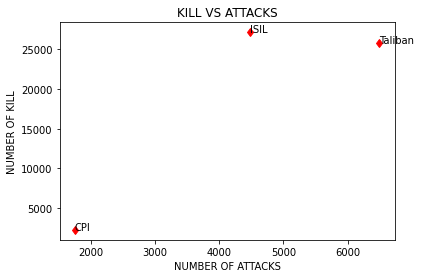

In [ ]:
number_of_attack=[Taliban_number_attack,CPI_number_attack,ISIL_number_attack] # list of attacks 
number_of_kill=[Taliban_number_kill,CPI_number_kill,ISIL_number_kill] # list of kills
plt.plot(number_of_attack,number_of_kill,'dr') #plotting number of attack vs number kills graph
plt.title('KILL VS ATTACKS') # giving title to the graph
plt.xlabel('NUMBER OF ATTACKS') # labeling x axis
plt.ylabel('NUMBER OF KILL') # labeling y axis
for i in range(3):
        plt.text(number_of_attack[i],number_of_kill[i],my_gang[i]) # marks the dots with name 

DEATH RATE FROM 2004-2017

      number_of_kill
year                
2004          4523.0
2005          4876.0
2006          6249.0
2007         10340.0
2008          7937.0
2009          7428.0
2010          7414.0
2011          7528.0
2012         13654.0
2013         19717.0
2014         27234.0
2015         28402.0
2016         28937.0
2017         22745.0


Text(0, 0.5, 'sum of death')

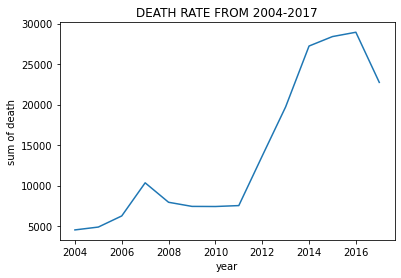

In [ ]:
two_004_2017=my_data[(my_data['year']>=2004) & (my_data['year']<=2017)] # extracting data between 2004-2017
yearly_kills_sum=two_004_2017.groupby(['year']).sum('number_of_kill').loc[:,['number_of_kill']] # groupby on year and agregation on number of kills
print(yearly_kills_sum)
plt.plot(yearly_kills_sum) # plotting yearly death between 2004-2017
plt.title('DEATH RATE FROM 2004-2017') # giving title to the graph
plt.xlabel('year') # labeling x axis
plt.ylabel('sum of death') # labeling y axis

# from this plot we can clearly say that humanity loss is increased from 2004-2017

**CORRELATIONS**

In [ ]:
my_data.corr() # checking the correlation between all the columns in the dataset

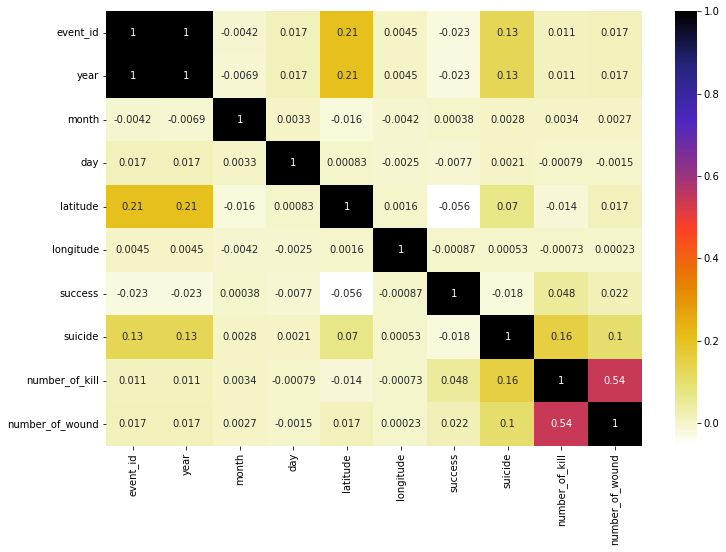

In [ ]:
plt.figure(figsize=(12,8))#giving the size to our figure
cor=my_data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r) # showing the correlation interms of heatmap
plt.show()

### now we will check the method of attacks which is used repeatedly by top 2 gangs 

In [ ]:
Taliban_Isil=my_data[(my_data['gang_name']=='Taliban')|(my_data['gang_name']=='Islamic State of Iraq and the Levant (ISIL)')]
Taliban_Isil['attack_type'].value_counts().idxmax()


'Bombing/Explosion'

In [ ]:
# this means top 2 gangs used bombing/explosions mostly in thier attacks

# conclusion
1.Country with most attacks:  Iraq

2.City with most attacks:  Baghdad

3.Region with the most attacks: Middle East & North Africa

4.Year with the most attacks: 2014

5.Month with the most attacks: 5

6.Group with the most attacks: Taliban

7.Most Attack Types: Bombing/Explosion

8.gang_name	VS number_of_kill

     a) Islamic State of Iraq and the Levant (ISIL)	27174.0

     b)	Taliban	25785.0

     c)	Boko Haram	10732.0

     d)	Liberation Tigers of Tamil Eelam (LTTE)	9393.0

     e)	Shining Path (SL)	9315.0

     f)	Al-Shabaab	6836.0

     g)	Farabundo Marti National Liberation Front (FMLN)	6801.0

     h)	Tehrik-i-Taliban Pakistan (TTP)	5580.0

     i)	Revolutionary Armed Forces of Colombia (FARC)	4380.0

     j)	Kurdistan Workers' Party (PKK)	4093.0

     k)	Al-Qaida in Iraq	3984.0

     l)	Nicaraguan Democratic Force (FDN)	3883.0

     m)	Al-Qaida	3818.0

     n)	Hutu extremists	3203.0

9.Maximum human killed by ISIL

10.country	VS number_of_kill ( top 10)

     a) Iraq	64542

     b) Afghanistan	34375

     c)	Pakistan 21412

     d)	India	16882

     e)	Srilanka 13273

     f)	columbia 12035

     g)	Peru	4916

     h)	nigeria 11313

     i)	peru 10403

     j)	El Salvador	10124

11.YEAR AND NUMBER OF KILLS (2004-2017)

     a) 2004	4523

     b) 2005	4876

     c) 2006	6249

     d) 2007	10340

     e) 2008	7937

     f) 2009	7428

     g) 2010	7414

     h) 2011	7528

     i) 2012	13654

     j) 2013	19717

     k) 2014	27234

     l) 2015	28402

     m) 2016	28937

     n) 2017	22745

12.The method of attacks which is used repeatedly by top 2 gangs
     *) Bombing/Explosion

13.Al_Qaida Mostly used bombing/explosion for attacking
so if we control on the illegal tranportation of weapons then we can reduse the attacks
we can see that in only one year (2001) there were 2 attacks on the same day on a same place
so we can say that there might be some disput between USA and Al_Qaida